## **Descripción del Problema de Negocio:**

En el contexto empresarial de un servicio de reconocimiento de imágenes, nos enfrentamos al desafío de desarrollar un sistema de detección de objetos en imágenes utilizando el conjunto de datos CIFAR-10 proporcionado por Keras. Este problema tiene aplicaciones prácticas en diversas industrias, como la automotriz, la de seguridad, la de retail y la de atención médica.



Imaginemos una empresa que se especializa en el desarrollo de sistemas de asistencia a conductores inteligentes para automóviles. En este caso, el problema de negocio es mejorar la capacidad del sistema de visión del vehículo para identificar y clasificar objetos en tiempo real. Esto es crucial para garantizar la seguridad del conductor y de los ocupantes del vehículo.

## **Propuesta de Solución:**

Desarrollo de un Modelo Predictivo de Redes Neuronales para Detección de Objetos en Imágenes
1. Definición del Modelo:
Se propone el desarrollo de un modelo predictivo basado en redes neuronales convolucionales (CNN) para la detección de objetos en imágenes. Las redes neuronales convolucionales son especialmente efectivas en tareas de visión por computadora y han demostrado su capacidad para identificar patrones complejos en datos visuales.
2. Arquitectura del Modelo:
La arquitectura de la CNN se diseña para capturar características específicas de los objetos en las imágenes. Se utilizarán capas convolucionales y capas totalmente conectadas para extraer y aprender patrones jerárquicos. La elección de la arquitectura depende de la complejidad del problema y de la cantidad de datos disponibles.
3. Preprocesamiento de Datos:
Antes de alimentar los datos al modelo, se realiza un preprocesamiento exhaustivo. Esto incluirá la normalización de píxeles, el aumento de datos para evitar el sobreajuste y la segmentación de objetos para proporcionar información contextual adicional.
4. Conjunto de Datos:
Se utiliza el conjunto de datos CIFAR-10 para el entrenamiento y la validación del modelo. Este conjunto de datos contiene 60,000 imágenes en color de 32x32 píxeles, agrupadas en 10 clases diferentes de objetos. Este conjunto de datos es adecuado para nuestro problema de detección de objetos.
5. Entrenamiento y Validación del Modelo:
El modelo se entrena utilizando el conjunto de datos CIFAR-10, dividiéndolo en conjuntos de entrenamiento y validación. Durante el entrenamiento, el modelo ajustará sus pesos y aprenderá a reconocer patrones específicos relacionados con objetos en imágenes.
6. Evaluación del Modelo:
Se evaluará la eficacia del modelo utilizando métricas de rendimiento, como precisión, recall y F1-score, en el conjunto de datos de validación. Se realizará una validación cruzada y ajuste fino del modelo para garantizar su robustez y generalización.


IMPORTAMOS LIBRERIAS

In [1]:
#!pip install --upgrade tensorflow
import numpy as np
from keras.datasets import cifar10
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import GridSearchCV


IMPORTAMOS LA DATA

In [2]:
# dataset : https://keras.io/api/datasets/cifar10/
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Explorar el conjunto de datos
print("Forma de datos de entrenamiento:", train_data.shape)
print("Forma de etiquetas de entrenamiento:", train_labels.shape)
print("Forma de datos de prueba:", test_data.shape)
print("Forma de etiquetas de prueba:", test_labels.shape)

Forma de datos de entrenamiento: (50000, 32, 32, 3)
Forma de etiquetas de entrenamiento: (50000, 1)
Forma de datos de prueba: (10000, 32, 32, 3)
Forma de etiquetas de prueba: (10000, 1)


## **Limpieza y transformación de datos:** 

In [3]:
# Normalizar píxeles al rango [0, 1]
train_data = train_data / 255.0
test_data = test_data / 255.0

## **Ajustar Redes Neuronales:**

VISUALIZANDO LAS IMÁGENES



In [4]:
# Creando una lista de nombres de las clases
class_names = ['avión', 'automóvil', 'ave', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'tractor']

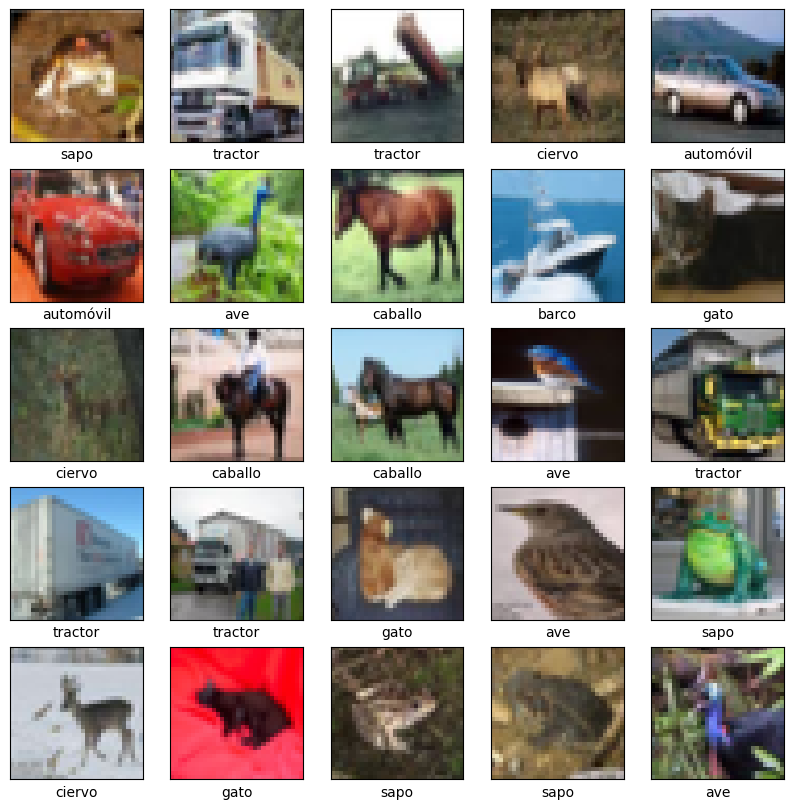

In [5]:
# Visualizando algunas imágenes en el dataset de entrenamiento
plt.figure(figsize=[10,10])
for i in range (25):    # para las primeras 5 imágenes
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [6]:
x_train = train_data.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
print(train_labels[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **SIN REGULARIZACIÓN**

In [9]:
ann1 = models.Sequential()
ann1.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(64,activation='relu'))
ann1.add(layers.Dense(32,activation='relu',))
ann1.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
ann1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 516)               1585668   
                                                                 
 dense_1 (Dense)             (None, 128)               66176     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compilación**

In [10]:
### COMPILACIÓN de la ANN1
ann1.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

**Entrenamiento**

In [11]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [12]:
### Entrenamiento de la ANN1
history1 = ann1.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40


88/88 [==============================] - 14s 96ms/step - loss: 2.1627 - accuracy: 0.1745 - val_loss: 2.0465 - val_accuracy: 0.2258
Epoch 2/40
88/88 [==============================] - 8s 87ms/step - loss: 2.0224 - accuracy: 0.2404 - val_loss: 1.9585 - val_accuracy: 0.2774
Epoch 3/40
88/88 [==============================] - 7s 81ms/step - loss: 1.9328 - accuracy: 0.2817 - val_loss: 1.8846 - val_accuracy: 0.3116
Epoch 4/40
88/88 [==============================] - 7s 77ms/step - loss: 1.8652 - accuracy: 0.3224 - val_loss: 1.8236 - val_accuracy: 0.3366
Epoch 5/40
88/88 [==============================] - 7s 80ms/step - loss: 1.8170 - accuracy: 0.3403 - val_loss: 1.7896 - val_accuracy: 0.3454
Epoch 6/40
88/88 [==============================] - 7s 76ms/step - loss: 1.7731 - accuracy: 0.3584 - val_loss: 1.7405 - val_accuracy: 0.3666
Epoch 7/40
88/88 [==============================] - 7s 74ms/step - loss: 1.7379 - accuracy: 0.3689 - val_loss: 1.7288 - val_accuracy: 0.3768
Epoch 8/40

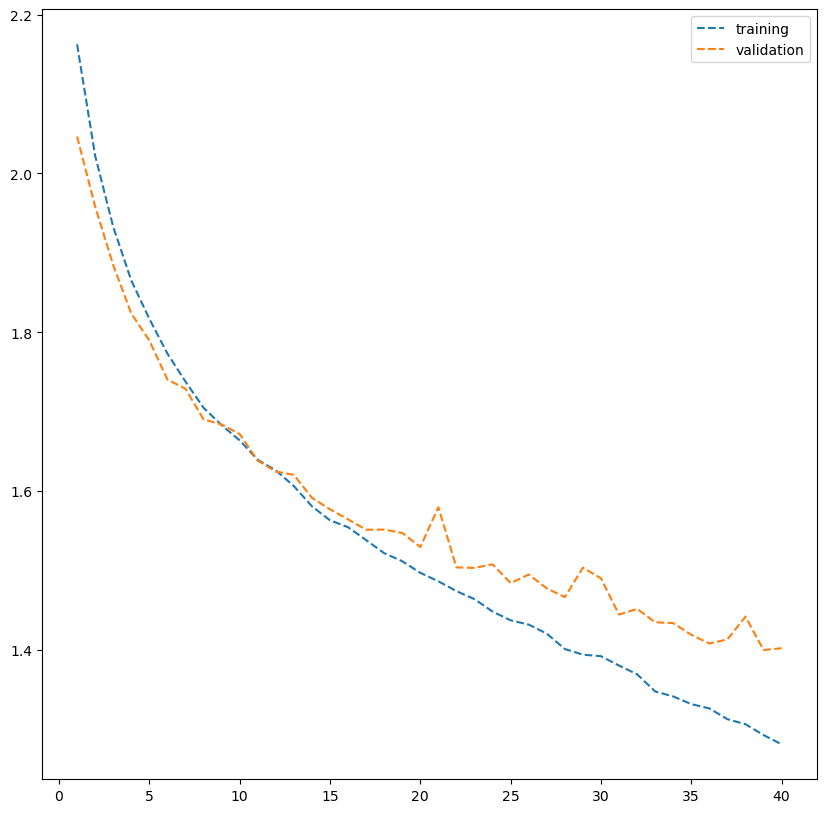

In [13]:
#Grafico
# loss
history_dict1 = history1.history
loss_values = history_dict1['loss']
val_loss_values = history_dict1['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

## **CON REGULARIZACIÓN**

CONTRUCCIÓN DEL MODELO

In [14]:
model = models.Sequential()
model.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 516)               1585668   
                                                                 
 dense_6 (Dense)             (None, 128)               66176     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compilación**

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ENTRENANDO EL MODELO

In [16]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [17]:
history2 = model.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40
88/88 [==============================] - 11s 86ms/step - loss: 2.2162 - accuracy: 0.1753 - val_loss: 2.0394 - val_accuracy: 0.2608
Epoch 2/40
88/88 [==============================] - 6s 70ms/step - loss: 2.0037 - accuracy: 0.2581 - val_loss: 1.9713 - val_accuracy: 0.2728
Epoch 3/40
88/88 [==============================] - 6s 68ms/step - loss: 1.9630 - accuracy: 0.2778 - val_loss: 1.9432 - val_accuracy: 0.2864
Epoch 4/40
88/88 [==============================] - 6s 69ms/step - loss: 1.9385 - accuracy: 0.2936 - val_loss: 1.9223 - val_accuracy: 0.3112
Epoch 5/40
88/88 [==============================] - 6s 68ms/step - loss: 1.9186 - accuracy: 0.3067 - val_loss: 1.8842 - val_accuracy: 0.3230
Epoch 6/40
88/88 [==============================] - 6s 72ms/step - loss: 1.8884 - accuracy: 0.3210 - val_loss: 1.8858 - val_accuracy: 0.3244
Epoch 7/40
88/88 [==============================] - 11s 121ms/step - loss: 1.8721 - accuracy: 0.3269 - val_loss: 1.8475 - val_accuracy: 0.3352
Epoch 8/40

EVALUANDO EL DATASET

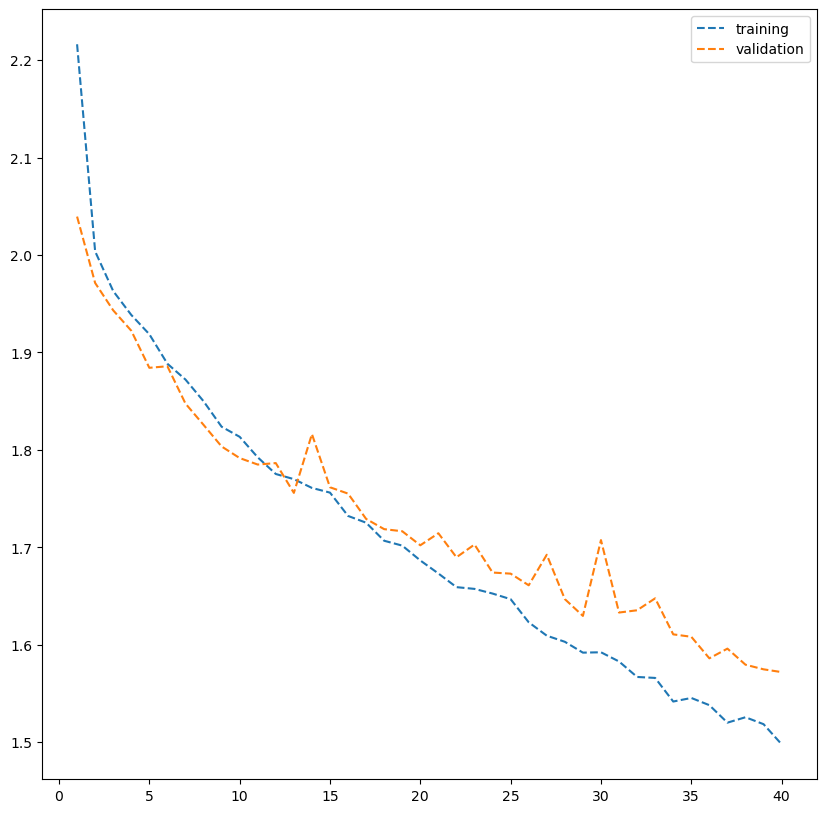

In [18]:
# loss
history_dict2 = history2.history
loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

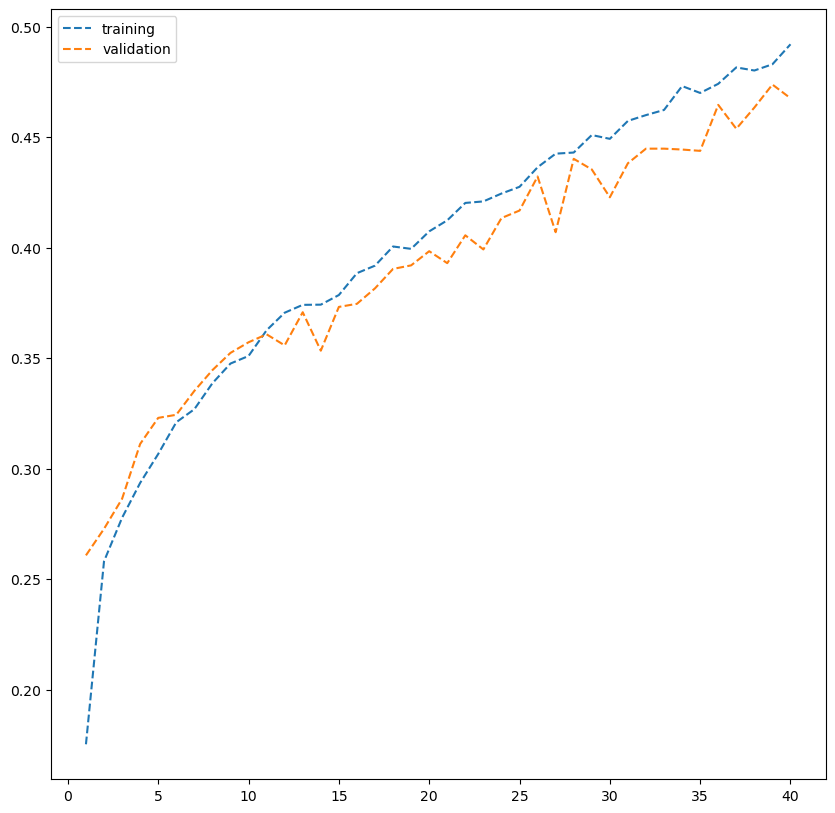

In [20]:
# accuracy
history_dict = history2.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(accuracy)+1)
plt.plot(epoch, accuracy, '--', label = 'training')
plt.plot(epoch, val_accuracy, '--', label = 'validation')
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5507 - accuracy: 0.4774


[1.5506742000579834, 0.477400004863739]

PREDICCIONES

In [22]:
# Haciendo predicciones
y_predict = model.predict(x_test)

# Convirtiendo las predicciones en un label (tomando el valor máximo de predicción)
y_predict_classes = np.argmax(y_predict, axis=1)

313/313 [==============================] - 2s 7ms/step


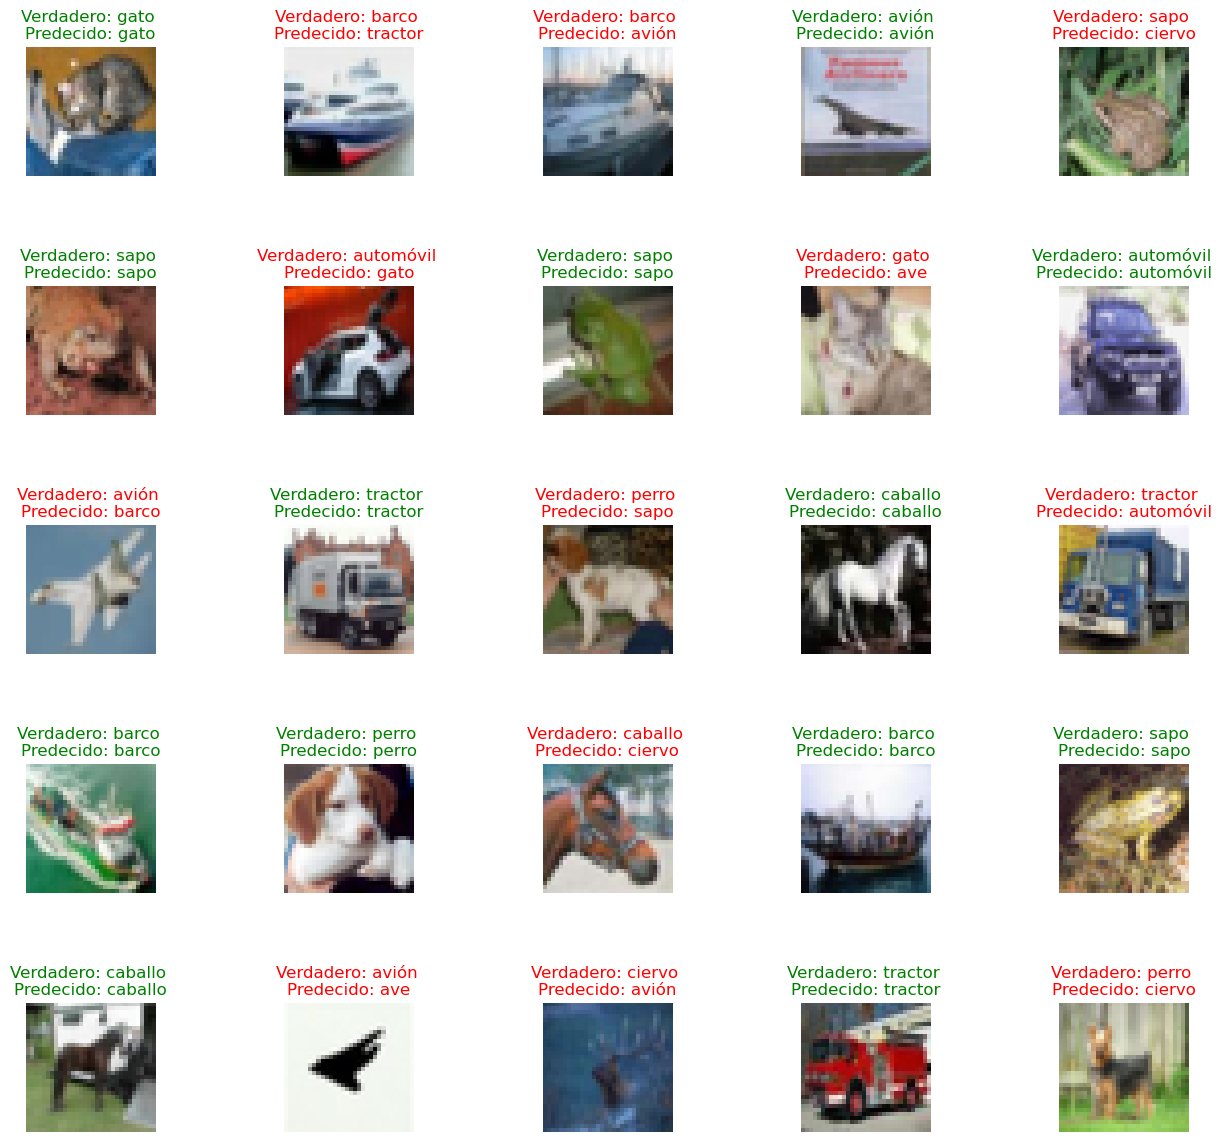

In [23]:
# Graficando Clase real vs. Clase predecidas

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_data[i])
    title_color = "green" if np.argmax(y_test[i]) == y_predict_classes[i] else "red"
    axes[i].set_title("Verdadero: %s \nPredecido: %s" % (class_names[np.argmax(y_test[i])], class_names[y_predict_classes[i]]), color=title_color)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Historial de entrenamiento**

In [25]:
### Listado de toda la data almacenada en 'history'
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


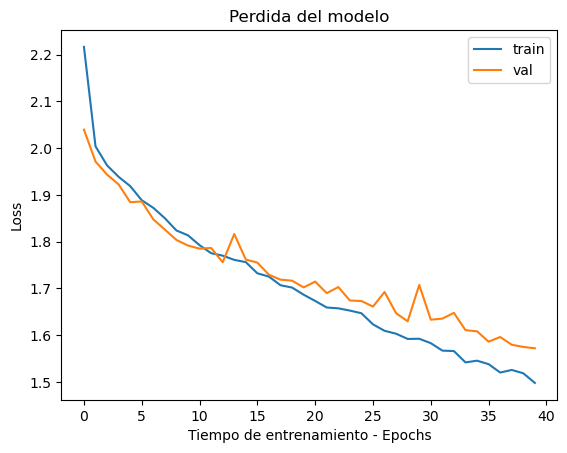

In [26]:
### Visualización de las curvas de error
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

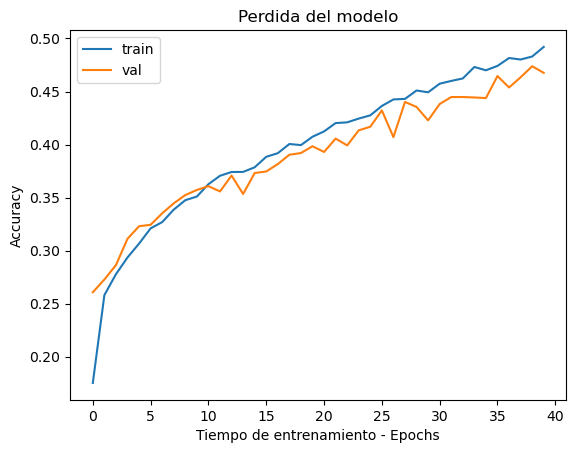

In [27]:
### Visualización de las curvas de error
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

**Definir Red con regularización**

**Compilación**

## **CONCLUCIONES**